<a href="https://colab.research.google.com/github/ferugit/speaker-recognition-exploration/blob/testing/EER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pandas
! pip install numpy
! pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib

In [ ]:
df = pd.read_csv('dataset.tsv', header = 0, sep = '\t')


In [ ]:
df

,Speaker_ID,Filename,Label,Similarity,Prosody,Transcription,Length,Age,Gender,Accent,Room_Size,Microphone_Distance,Recording_Device,Start_Time,End_Time
0,gCWOiMTUosewLJRs,aura_wuw_gCWOiMTUosewLJRs_0000.wav,WuW,Exact,Unknown,"""OK Aura.""",6.2640,40s,Female,"España: Centro-sur peninsular (Madrid, Toledo,...",Medium (10 - 20 m2),Close,Desktop,2.9042,3.6805
1,gCWOiMTUosewLJRs,aura_wuw_gCWOiMTUosewLJRs_0001.wav,NonWuW,Exact with context,Unknown,"""OK Aura, ver encuentros y conferencias.""",3.8640,40s,Female,"España: Centro-sur peninsular (Madrid, Toledo,...",Medium (10 - 20 m2),Close,Desktop,Unknown,Unknown
2,gCWOiMTUosewLJRs,aura_wuw_gCWOiMTUosewLJRs_0002.wav,NonWuW,Aura,Unknown,"""Con ese aura que tiene conseguirá lo que se p...",3.4560,40s,Female,"España: Centro-sur peninsular (Madrid, Toledo,...",Medium (10 - 20 m2),Close,Desktop,0.5417,2.9008
3,gCWOiMTUosewLJRs,aura_wuw_gCWOiMTUosewLJRs_0003.wav,NonWuW,OK,Unknown,"""OK, ¿qué te parece?""",1.9440,40s,Female,"España: Centro-sur peninsular (Madrid, Toledo,...",Medium (10 - 20 m2),Close,Desktop,0.5097,1.8867
4,gCWOiMTUosewLJRs,aura_wuw_gCWOiMTUosewLJRs_0004.wav,NonWuW,like Aura,Unknown,"""Llama a aquel restaurante, el del otro día.""",2.7120,40s,Female,"España: Centro-sur peninsular (Madrid, Toledo,...",Medium (10 - 20 m2),Close,Desktop,0.5181,2.7120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,dIMuXH4U9FEpzCkX,aura_wuw_dIMuXH4U9FEpzCkX_0000.wav,WuW,Exact,Unknown,"""OK Aura.""",3.4080,20s,Male,Andino-Pacífico,Small (0 - 10 m2),Close,Unknown,1.5340,1.9356
1243,dIMuXH4U9FEpzCkX,aura_wuw_dIMuXH4U9FEpzCkX_0001.wav,NonWuW,Exact with context,Unknown,"""Perfecto, voy a mirar qué dan hoy. OK Aura.""",6.1440,20s,Male,Andino-Pacífico,Small (0 - 10 m2),Close,Unknown,Unknown,Unknown
1244,vwNrvXBBdKqe1JHH,aura_wuw_vwNrvXBBdKqe1JHH_0001.wav,NonWuW,Exact with context,Unknown,"""Perfecto, voy a mirar qué dan hoy. OK Aura.""",5.8776,20s,No binario,"Caribe: Cuba, Venezuela...",Small (0 - 10 m2),Close,Unknown,Unknown,Unknown
1245,FN9YWtXkcEFGq6mB,aura_wuw_FN9YWtXkcEFGq6mB_0000.wav,WuW,Exact,Unknown,"""OK Aura.""",4.6080,60s,Male,España: centro-sur peninsular,Small (0 - 10 m2),Close,Unknown,1.1543,3.1168


In [ ]:
df.describe

<bound method NDFrame.describe of             Speaker_ID                            Filename   Label  \
0     gCWOiMTUosewLJRs  aura_wuw_gCWOiMTUosewLJRs_0000.wav     WuW   
1     gCWOiMTUosewLJRs  aura_wuw_gCWOiMTUosewLJRs_0001.wav  NonWuW   
2     gCWOiMTUosewLJRs  aura_wuw_gCWOiMTUosewLJRs_0002.wav  NonWuW   
3     gCWOiMTUosewLJRs  aura_wuw_gCWOiMTUosewLJRs_0003.wav  NonWuW   
4     gCWOiMTUosewLJRs  aura_wuw_gCWOiMTUosewLJRs_0004.wav  NonWuW   
...                ...                                 ...     ...   
1242  dIMuXH4U9FEpzCkX  aura_wuw_dIMuXH4U9FEpzCkX_0000.wav     WuW   
1243  dIMuXH4U9FEpzCkX  aura_wuw_dIMuXH4U9FEpzCkX_0001.wav  NonWuW   
1244  vwNrvXBBdKqe1JHH  aura_wuw_vwNrvXBBdKqe1JHH_0001.wav  NonWuW   
1245  FN9YWtXkcEFGq6mB  aura_wuw_FN9YWtXkcEFGq6mB_0000.wav     WuW   
1246  FN9YWtXkcEFGq6mB  aura_wuw_FN9YWtXkcEFGq6mB_0001.wav  NonWuW   

              Similarity  Prosody  \
0                  Exact  Unknown   
1     Exact with context  Unknown   
2             

In [ ]:
len(df['Speaker_ID'].unique())

81

<Axes: >

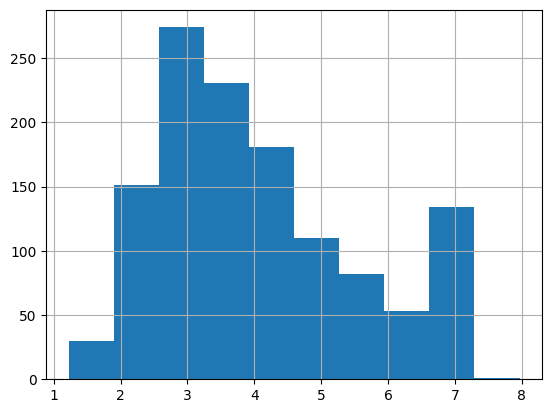

In [ ]:
df['Length'].hist()


<Axes: >

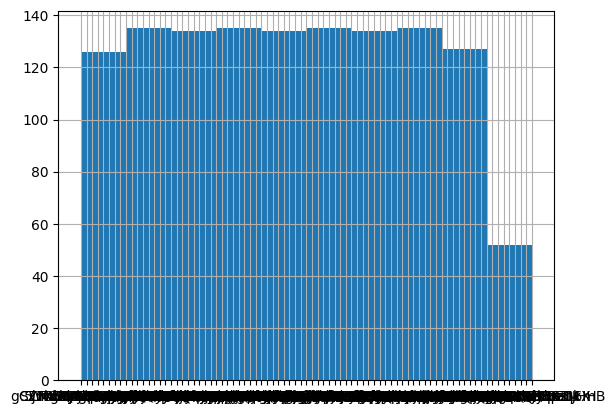

In [ ]:
df['Speaker_ID'].hist()

In [ ]:
! pip install speechbrain
! pip install scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.0/519.0 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 44.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc
import torch
import time
import os
import itertools
import torchaudio
from torchsummary import summary
from speechbrain.pretrained import SpeakerRecognition
verification = SpeakerRecognition.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb", savedir="pretrained_models/spkrec-ecapa-voxceleb")

In [ ]:
!unzip /content/clips.zip -d /content/clips

Archive:  /content/clips.zip
   creating: /content/clips/clips/
  inflating: /content/clips/clips/aura_wuw_0RLZ3AUVOBZr8OqN_0000.wav  
  inflating: /content/clips/clips/aura_wuw_0RLZ3AUVOBZr8OqN_0001.wav  
  inflating: /content/clips/clips/aura_wuw_0RLZ3AUVOBZr8OqN_0002.wav  
  inflating: /content/clips/clips/aura_wuw_0RLZ3AUVOBZr8OqN_0003.wav  
  inflating: /content/clips/clips/aura_wuw_0RLZ3AUVOBZr8OqN_0004.wav  
  inflating: /content/clips/clips/aura_wuw_0RLZ3AUVOBZr8OqN_0005.wav  
  inflating: /content/clips/clips/aura_wuw_0RLZ3AUVOBZr8OqN_0006.wav  
  inflating: /content/clips/clips/aura_wuw_0RLZ3AUVOBZr8OqN_0007.wav  
  inflating: /content/clips/clips/aura_wuw_0RLZ3AUVOBZr8OqN_0008.wav  
  inflating: /content/clips/clips/aura_wuw_0RLZ3AUVOBZr8OqN_0009.wav  
  inflating: /content/clips/clips/aura_wuw_0RLZ3AUVOBZr8OqN_0010.wav  
  inflating: /content/clips/clips/aura_wuw_0RLZ3AUVOBZr8OqN_0011.wav  
  inflating: /content/clips/clips/aura_wuw_0RLZ3AUVOBZr8OqN_0012.wav  
  inflating: 

In [ ]:
df = pd.read_csv('/content/dataset.tsv', header = 0, sep = '\t')
A = df['Speaker_ID'].value_counts()



unique_speaker_ids = A.index
string_to_number = {string: idx for idx, string in enumerate(unique_speaker_ids)}

# Map the 'Speaker_ID' column using the dictionary
df['Speaker_ID'] = df['Speaker_ID'].map(string_to_number)



B = df['Speaker_ID'].value_counts()


In [ ]:
prefix = "/content/clips/clips"

# Assuming you have a DataFrame called 'df' with a column 'path' containing the file paths
audio_files = df['Filename'].tolist()

# Add the prefix to each file path and keep only .wav files
audio_files = [os.path.join(prefix, f) for f in audio_files if f.endswith(".wav")]

# Pairwise comparison of audio files
#pairs = list(itertools.combinations(audio_files, 2))


true_labels = []

#print(pairs [:5])
#print(df['Filename'][10])

In [ ]:
# Pairwise comparison of audio files and speakers
# pairs = []
# unique_speaker_ids = df['Speaker_ID'].unique()

# for speaker_id in unique_speaker_ids:
#     speaker_files = df.loc[df['Speaker_ID'] == speaker_id, 'Filename'].tolist()
#     speaker_files = [os.path.join(prefix, f) for f in speaker_files if f.endswith(".wav")]
#     speaker_pairs = list(itertools.combinations(speaker_files, 2))
#     speaker_pairs_with_id = [((pair[0], pair[1]), (speaker_id, speaker_id)) for pair in speaker_pairs]
#     pairs.extend(speaker_pairs_with_id)

# scores = []
# true_labels = []

In [ ]:
speaker_files = []

A = df['Speaker_ID'].to_list()
B = df['Filename'].to_list()
speaker_files = list(zip(A, B))

prefix = "/content/clips/clips/"

import itertools

pairs = []
for speaker1, file1 in speaker_files:
    for speaker2, file2 in speaker_files:
        pairs.append([prefix+file1, prefix+file2, speaker1, speaker2])

In [ ]:
# true_labels = []
# predictions = []
# for pair in pairs:
#     (file1, file2), (speaker1, speaker2) = pair

#     score, prediction = verification.verify_files(os.path.join(file1), os.path.join(file2))
#     scores.append(score)

#     # Label: 1 if same speaker, 0 if different speakers
#     label = int(speaker1 == speaker2)
#     true_labels.append(label)
#     predictions.append(int(prediction))

# true_labels = np.array(true_labels)
# predictions = np.array(predictions)

In [ ]:
# for pair in pairs[:5]:
#     (file1, file2), (speaker1, speaker2) = pair

#     score, prediction = verification.verify_files(os.path.join( file1), os.path.join( file2))
#     scores.append(prediction)

#     # Label: 1 if same speaker, 0 if different speakers
#     true_labels.append(int(speaker1 == speaker2))
true_labels = []
predictions = []
scores = []
for pair in pairs[:500]:
    file1, file2, speaker1, speaker2 = pair
    print(f"{speaker1} and {speaker2}")
    score, prediction = verification.verify_files(os.path.join(file1), os.path.join(file2))
    scores.append(score)

    # Label: 1 if same speaker, 0 if different speakers
    label = int(speaker1 == speaker2)
    true_labels.append(label)
    predictions.append(int(prediction))

true_labels = np.array(true_labels)
predictions = np.array(predictions)
# Compute ROC curve and ROC area
fpr, tpr, threshold = roc_curve(true_labels, scores)


fnr = 1 - tpr
# the threshold of fnr == fpr
EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
#print(f"Equal Error Rate = {EER}")

EER2 = fnr[np.nanargmin(np.absolute((fnr - fpr)))]
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
print(f"Equal Error Rate  = {EER}, and the treshold = {eer_threshold}")


roc_auc = auc(fpr, tpr)


0 and 0
0 and 0
0 and 0
0 and 0
0 and 0
0 and 0
0 and 0
0 and 0
0 and 0
0 and 0
0 and 0
0 and 0
0 and 0
0 and 0
0 and 0
0 and 0
0 and 0
0 and 61
0 and 61
0 and 61
0 and 61
0 and 61
0 and 61
0 and 61
0 and 61
0 and 61
0 and 61
0 and 61
0 and 61
0 and 61
0 and 61
0 and 61
0 and 61
0 and 48
0 and 48
0 and 48
0 and 48
0 and 48
0 and 48
0 and 48
0 and 48
0 and 48
0 and 48
0 and 48
0 and 48
0 and 48
0 and 48
0 and 48
0 and 48
0 and 48
0 and 47
0 and 47
0 and 47
0 and 47
0 and 47
0 and 47
0 and 47
0 and 47
0 and 47
0 and 47
0 and 47
0 and 47
0 and 47
0 and 47
0 and 47
0 and 47
0 and 47
0 and 46
0 and 46
0 and 46
0 and 46
0 and 46
0 and 46
0 and 46
0 and 46
0 and 46
0 and 46
0 and 46
0 and 46
0 and 46
0 and 46
0 and 46
0 and 46
0 and 46
0 and 45
0 and 45
0 and 45
0 and 45
0 and 45
0 and 45
0 and 45
0 and 45
0 and 45
0 and 45
0 and 45
0 and 45
0 and 45
0 and 45
0 and 45
0 and 45
0 and 45
0 and 44
0 and 44
0 and 44
0 and 44
0 and 44
0 and 44
0 and 44
0 and 44
0 and 44
0 and 44
0 and 44
0 and 44


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
EER2 = fnr[np.nanargmin(np.absolute((fnr - fpr)))]
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
print(f"Equal Error Rate = {EER}, and the treshold = {eer_threshold}")

Equal Error Rate = 0.14285714285714285, and the treshold = tensor([0.3036])


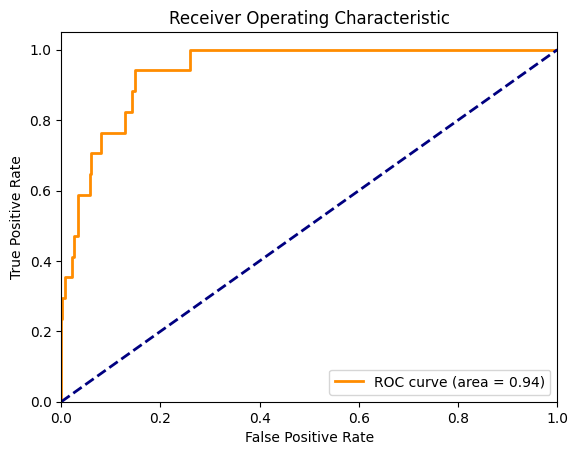

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# plt.plot(fpr, tpr, color='blue', label='ROC Curve')
# plt.scatter(far, 1 - frr, color='red', marker='o', label='EER Point')
# plt.xlabel('False Acceptance Rate (FAR)')
# plt.ylabel('1 - False Rejection Rate (FRR)')
# plt.title('Equal Error Rate (EER) Point')
# plt.legend()
# plt.grid(True)
# plt.show()

# New Section